<a href="https://colab.research.google.com/github/joaochenriques/FluidMechanics2/blob/main/Blasius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple solution of the Blasius boundary layer equations 

$$f^{\prime\prime\prime}+\frac 12 f f^\prime = 0$$

subject to the boundary conditions

$$u(x,y=0)=\left.\frac{df}{d\eta}\right|_{\eta=0}=0$$  
$$v(x,y=0)=f(\eta=0)=0$$  
$$u(x,y\rightarrow \infty)=\left.\frac{df}{d\eta}\right|_{\eta=\infty}=1$$  

In [1]:
# import required libs
import numpy as np
from scipy.integrate import odeint
from pylab import *
from IPython.display import Latex
import pandas as pd

In [ ]:
# plot config
import mpl_utils as mut
mut.config_plot()

The present numerical solution uses a simple a shooting method.

First, the differential equations is assemble as a first order system using

$$\mathbf{f}
=
\begin{pmatrix}
f\\
f^\prime\\
f^{\prime\prime}
\end{pmatrix}
=
\begin{pmatrix}
f_0\\
f_1\\
f_2
\end{pmatrix}
$$

giving

$$
\frac{d}{d \eta}
\begin{pmatrix}
f\\
f^\prime\\
f^{\prime\prime}
\end{pmatrix}
=
\frac{d}{d \eta}
\begin{pmatrix}
f_0\\
f_1\\
f_2
\end{pmatrix}
=
\begin{pmatrix}
f_1\\
f_2\\
-\frac 12 f_0 f_2
\end{pmatrix}
$$

subject to the boundary conditions

$\displaystyle u(x,y=0)=f_1=0$  
$\displaystyle v(x,y=0)=f_0=0$ 

and $\displaystyle \left.\frac{d^2f}{d\eta^2}\right|_{\eta=0}$ is changed iteratively until $f_1(\eta=\eta_\max)=1$  

where $\eta_\max$ is a large constant, say 12 


In [ ]:
def Blasius( f, η ):
    return ( f[1], f[2], -0.5 * f[0] * f[2] )

In [ ]:
ηmax = 12
η = np.linspace( 0, ηmax, ηmax*10+1 )

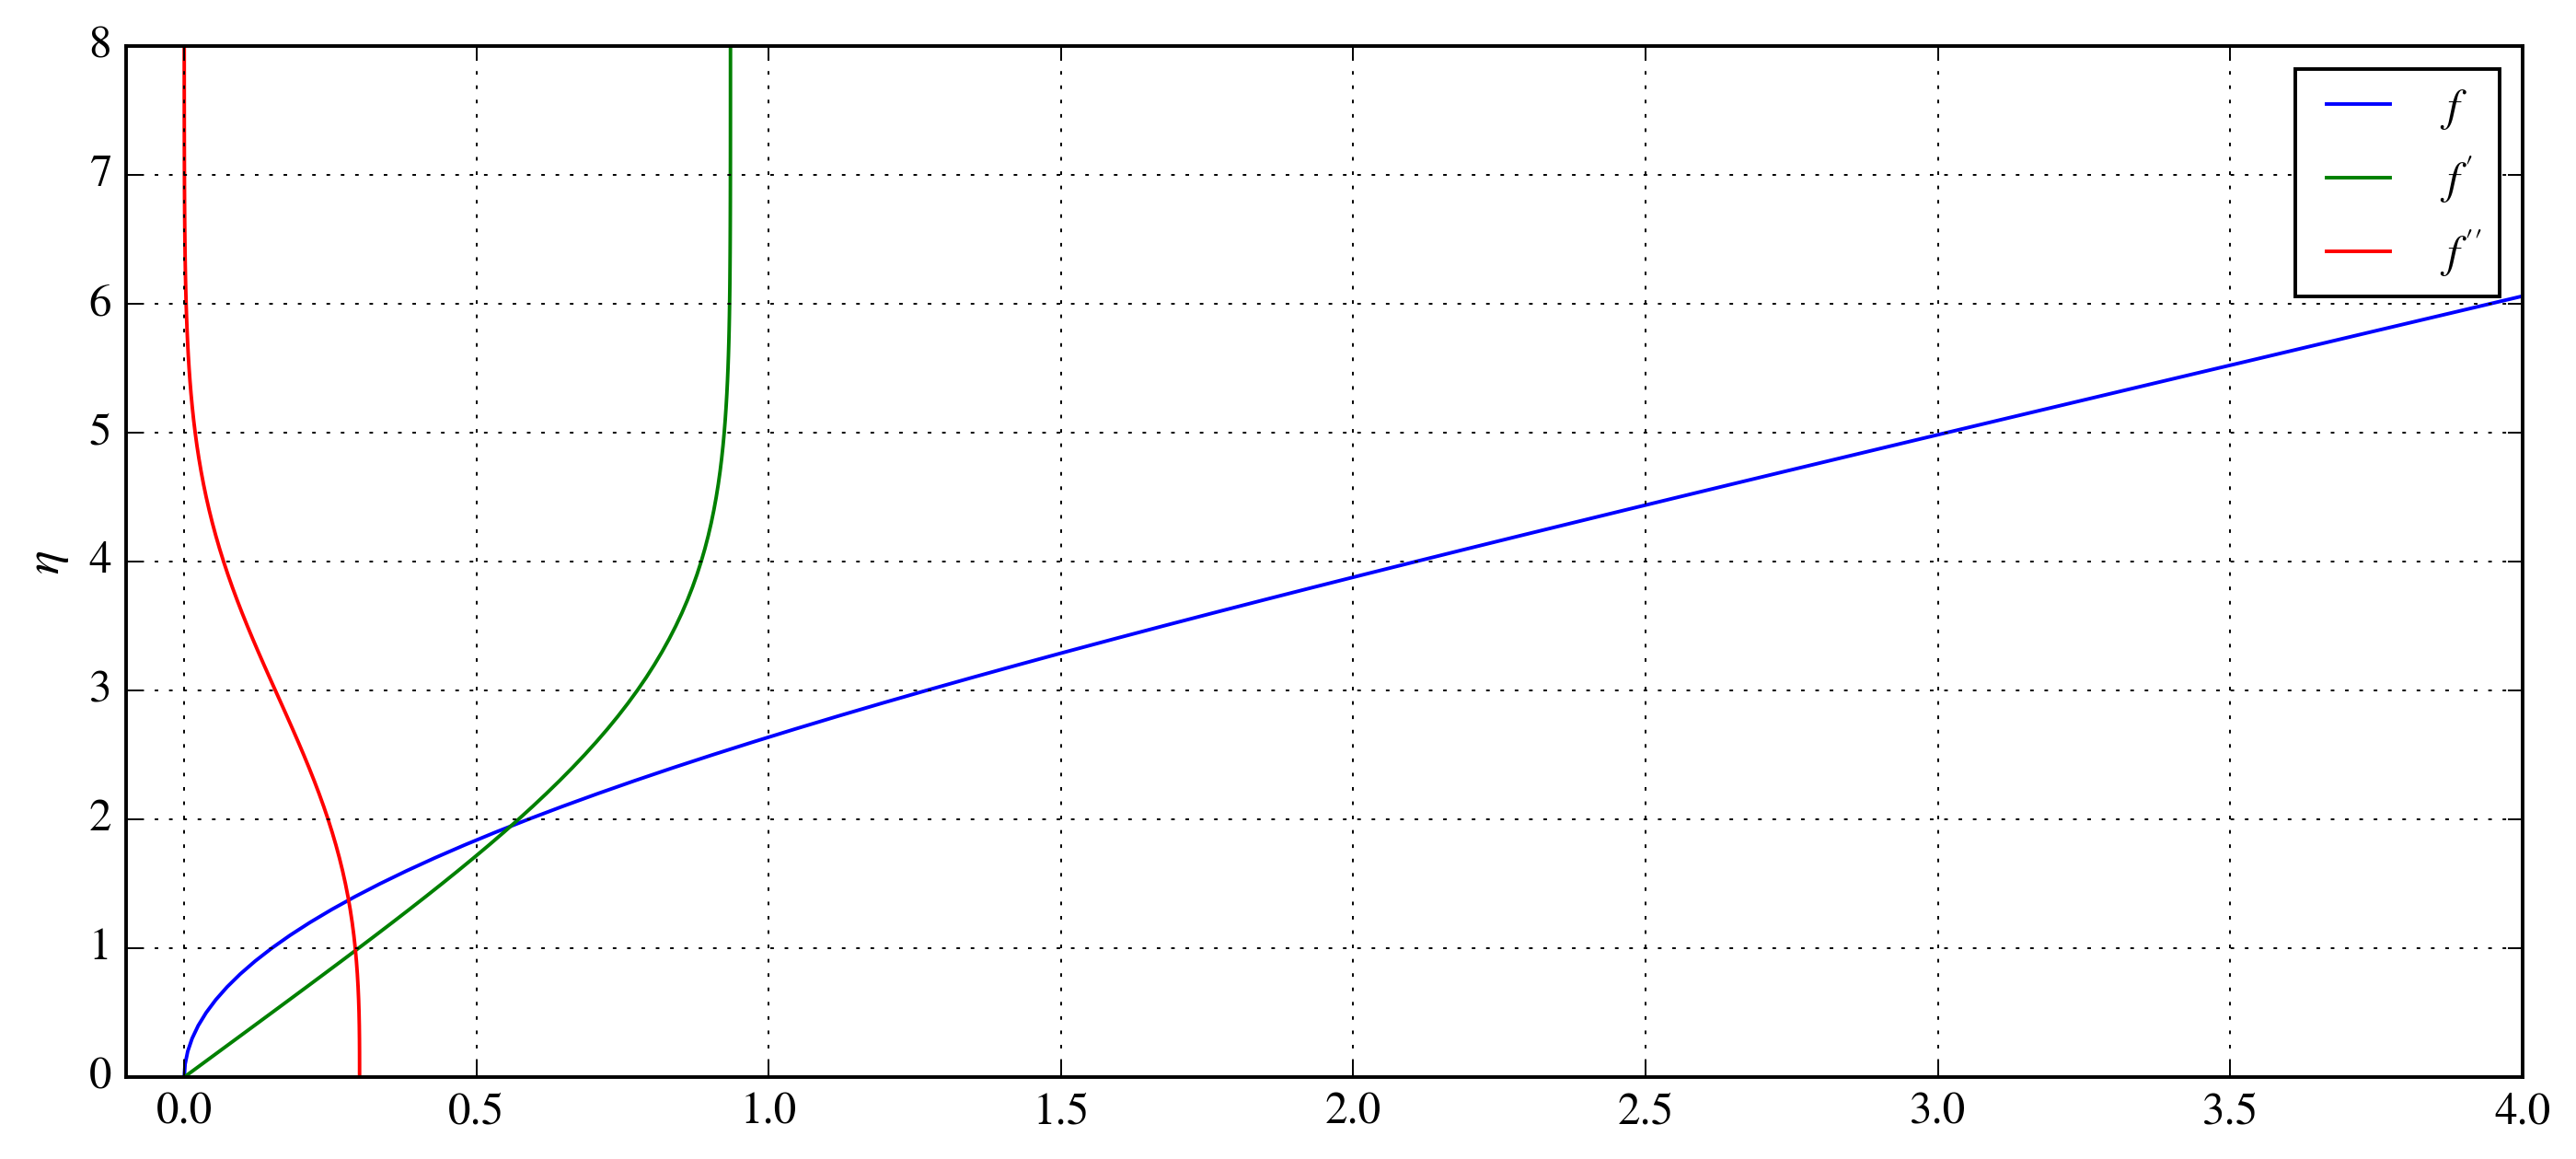

In [ ]:
f_initial = ( 0.0, 0.0, 0.3 )
solution = odeint( Blasius, f_initial, η )
f = solution.transpose()

plot( f[0], η, label='$f$' )
plot( f[1], η, label='$f\'$' )
plot( f[2], η, label='$f\'\'$' )
ylabel( r'$\eta$')
legend()
grid()
xlim( (-0.1,4) )
ylim( (0,8) );

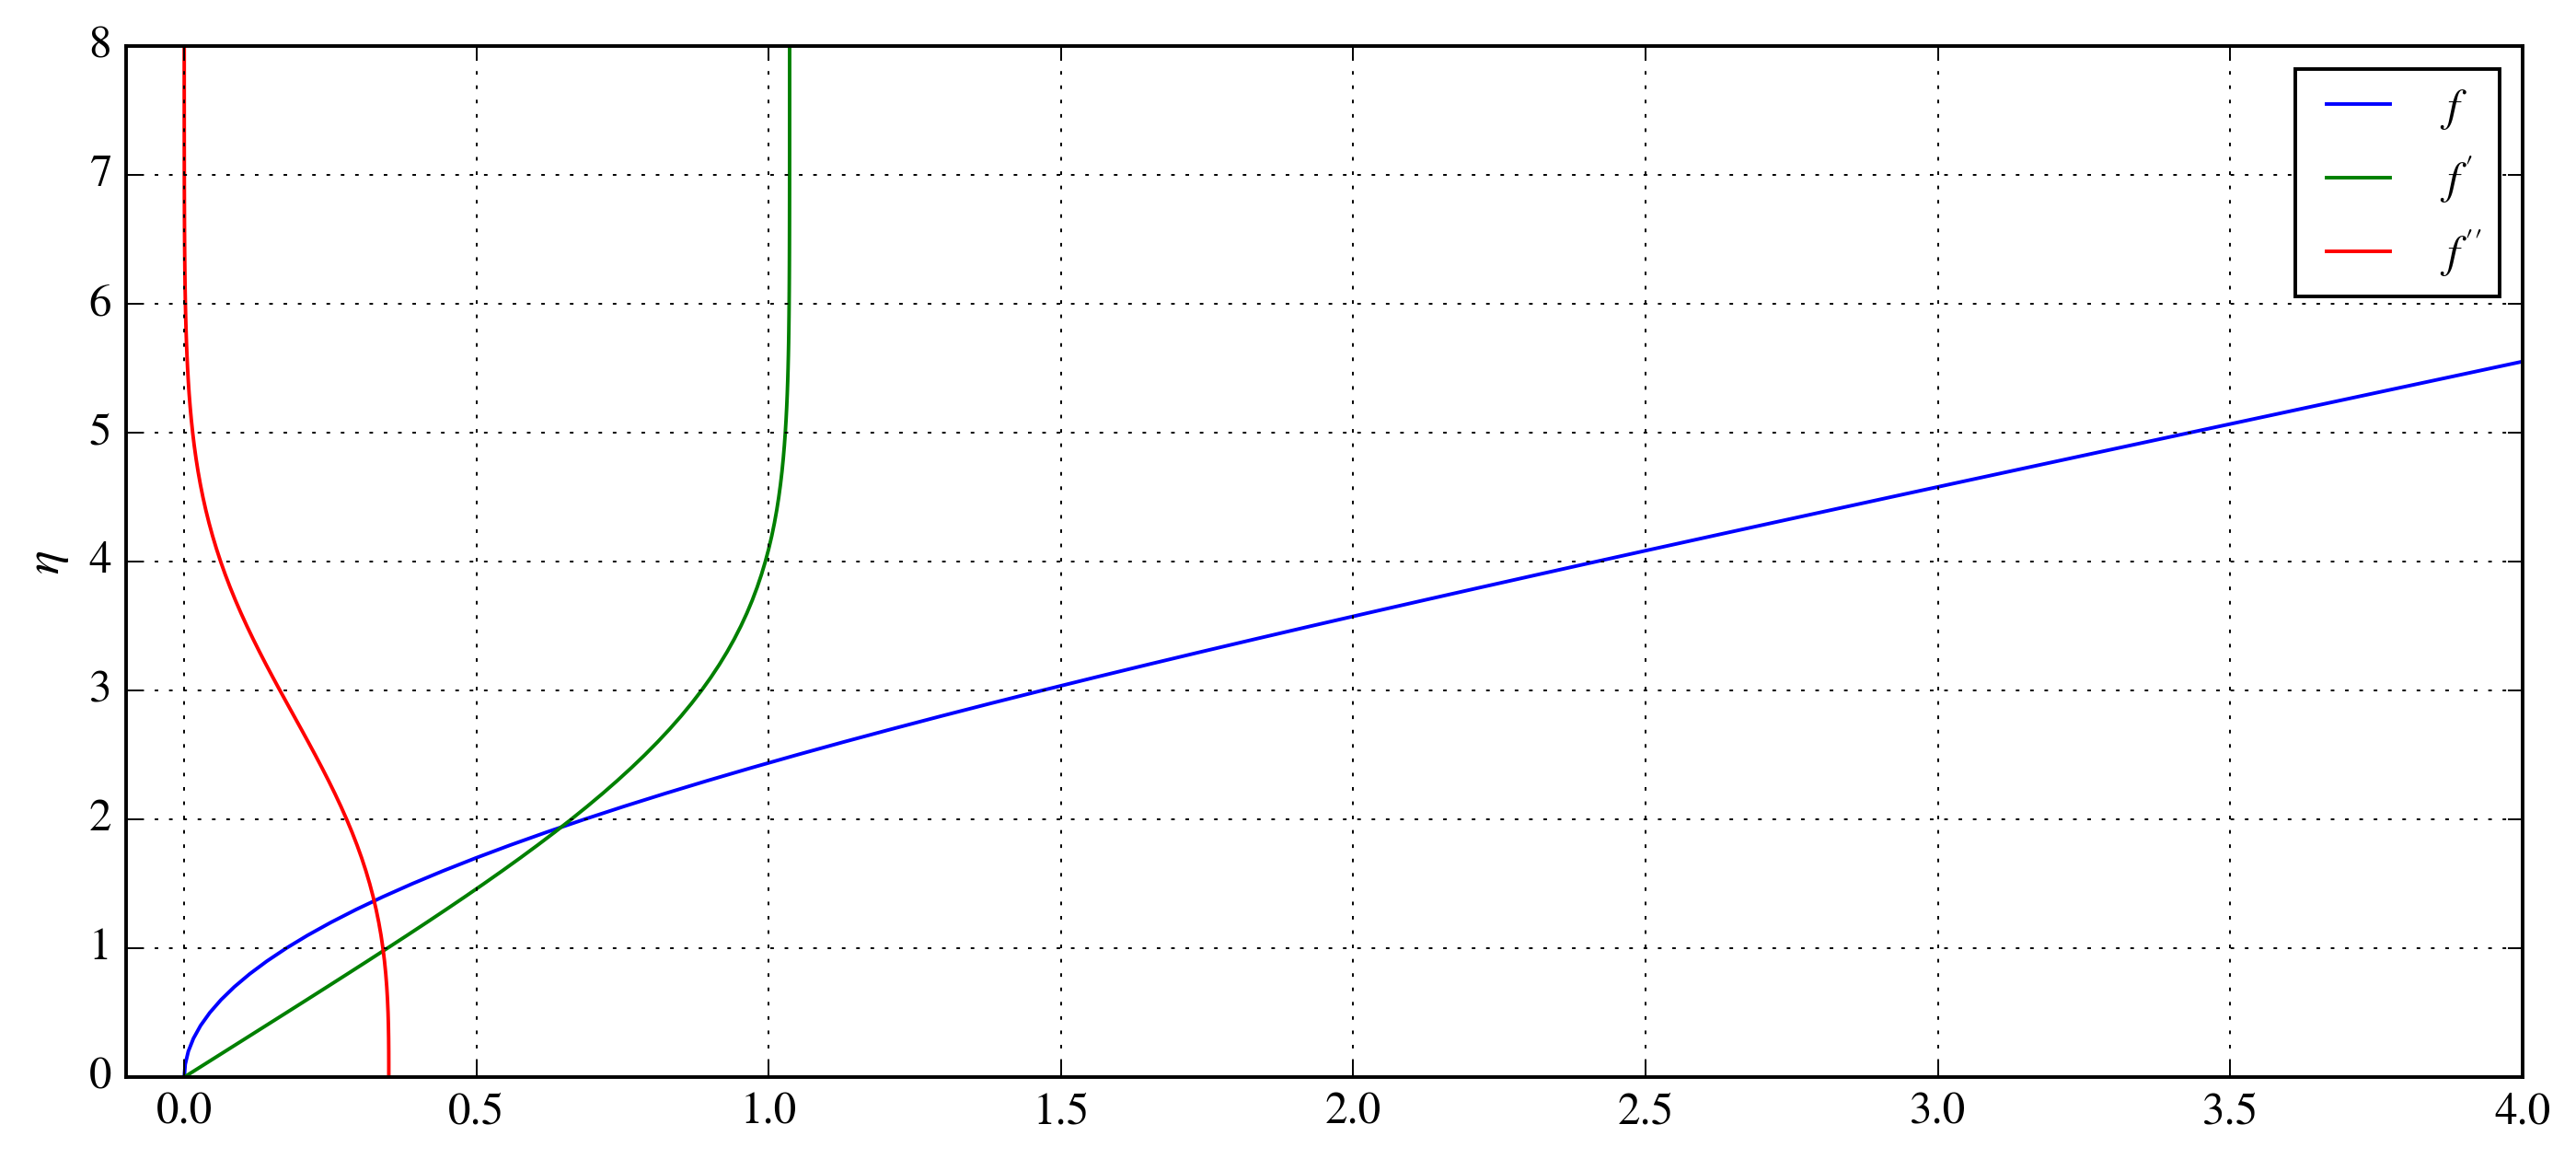

In [ ]:
f_initial = ( 0.0, 0.0, 0.35 )
solution = odeint( Blasius, f_initial, η )
f = solution.transpose()

plot( f[0], η, label='$f$' )
plot( f[1], η, label='$f\'$' )
plot( f[2], η, label='$f\'\'$' )
ylabel( r'$\eta$')
legend()
grid()
xlim( (-0.1,4) )
ylim( (0,8) );

<IPython.core.display.Latex object>

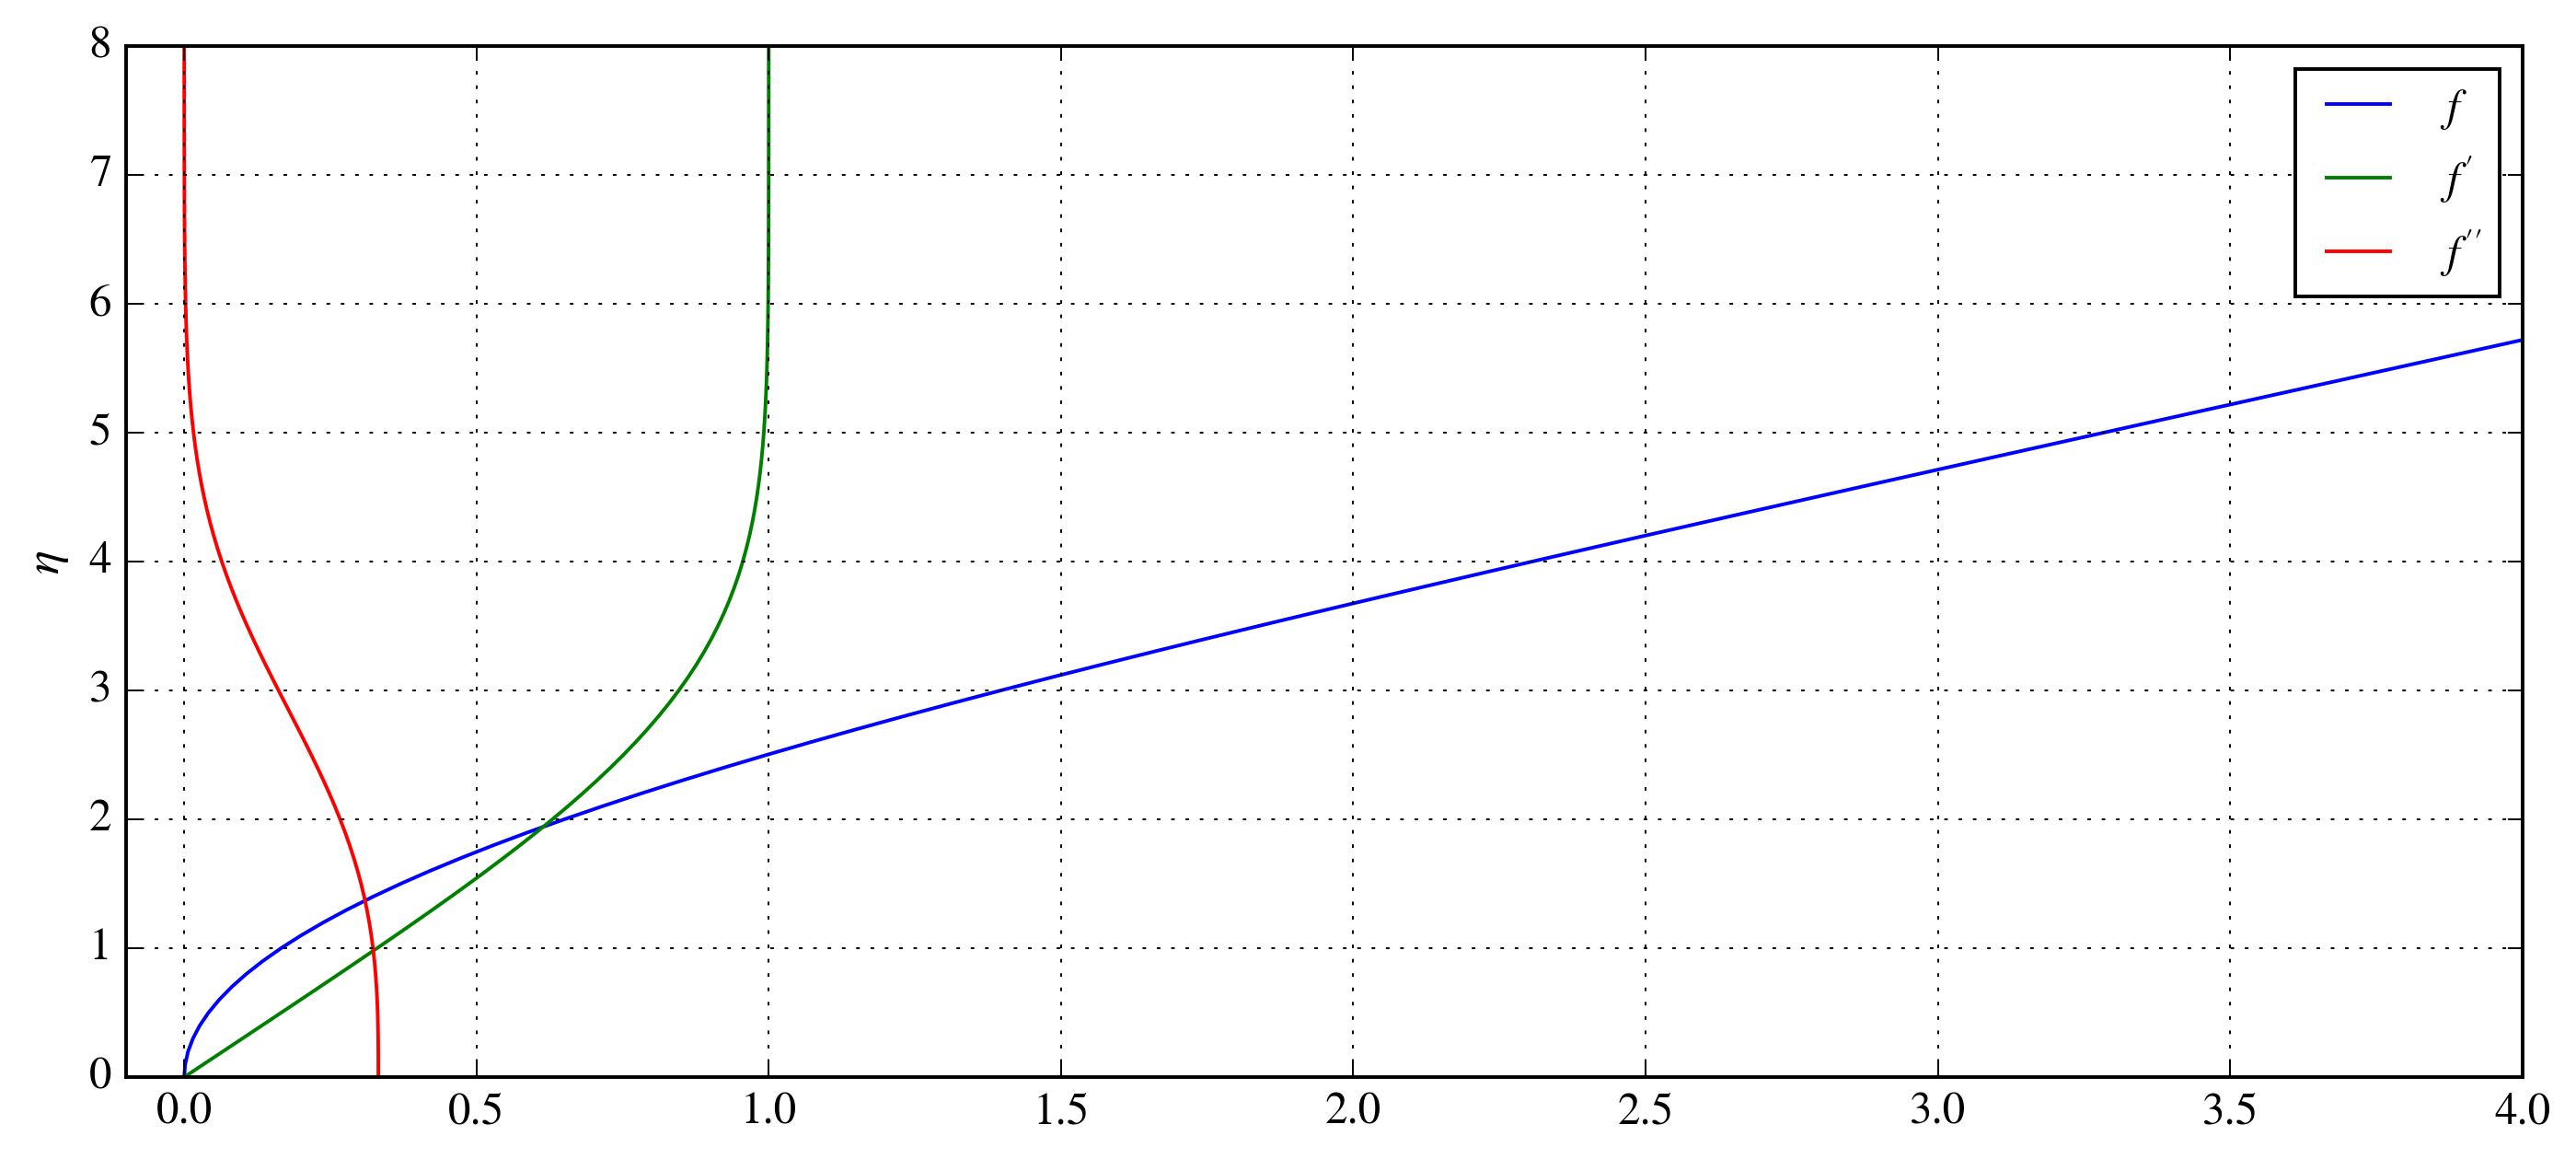

In [ ]:
f2_Boyd = 0.33205733621519630
f_initial = ( 0.0, 0.0, f2_Boyd )
solution = odeint( Blasius, f_initial, η )
f = solution.transpose()

plot( f[0], η, label='$f$' )
plot( f[1], η, label='$f\'$' )
plot( f[2], η, label='$f\'\'$' )
ylabel( r'$\eta$')
legend()
grid()
xlim( (-0.1,4) )
ylim( (0,8) );
Latex( r'$f^\prime=\left(df/d\eta\right)|_{\eta_\max}=%.14f$' % f[1][-1] )

Plot of the dimensionless velocity $\displaystyle \frac{u}{U_e}=f_1$ 

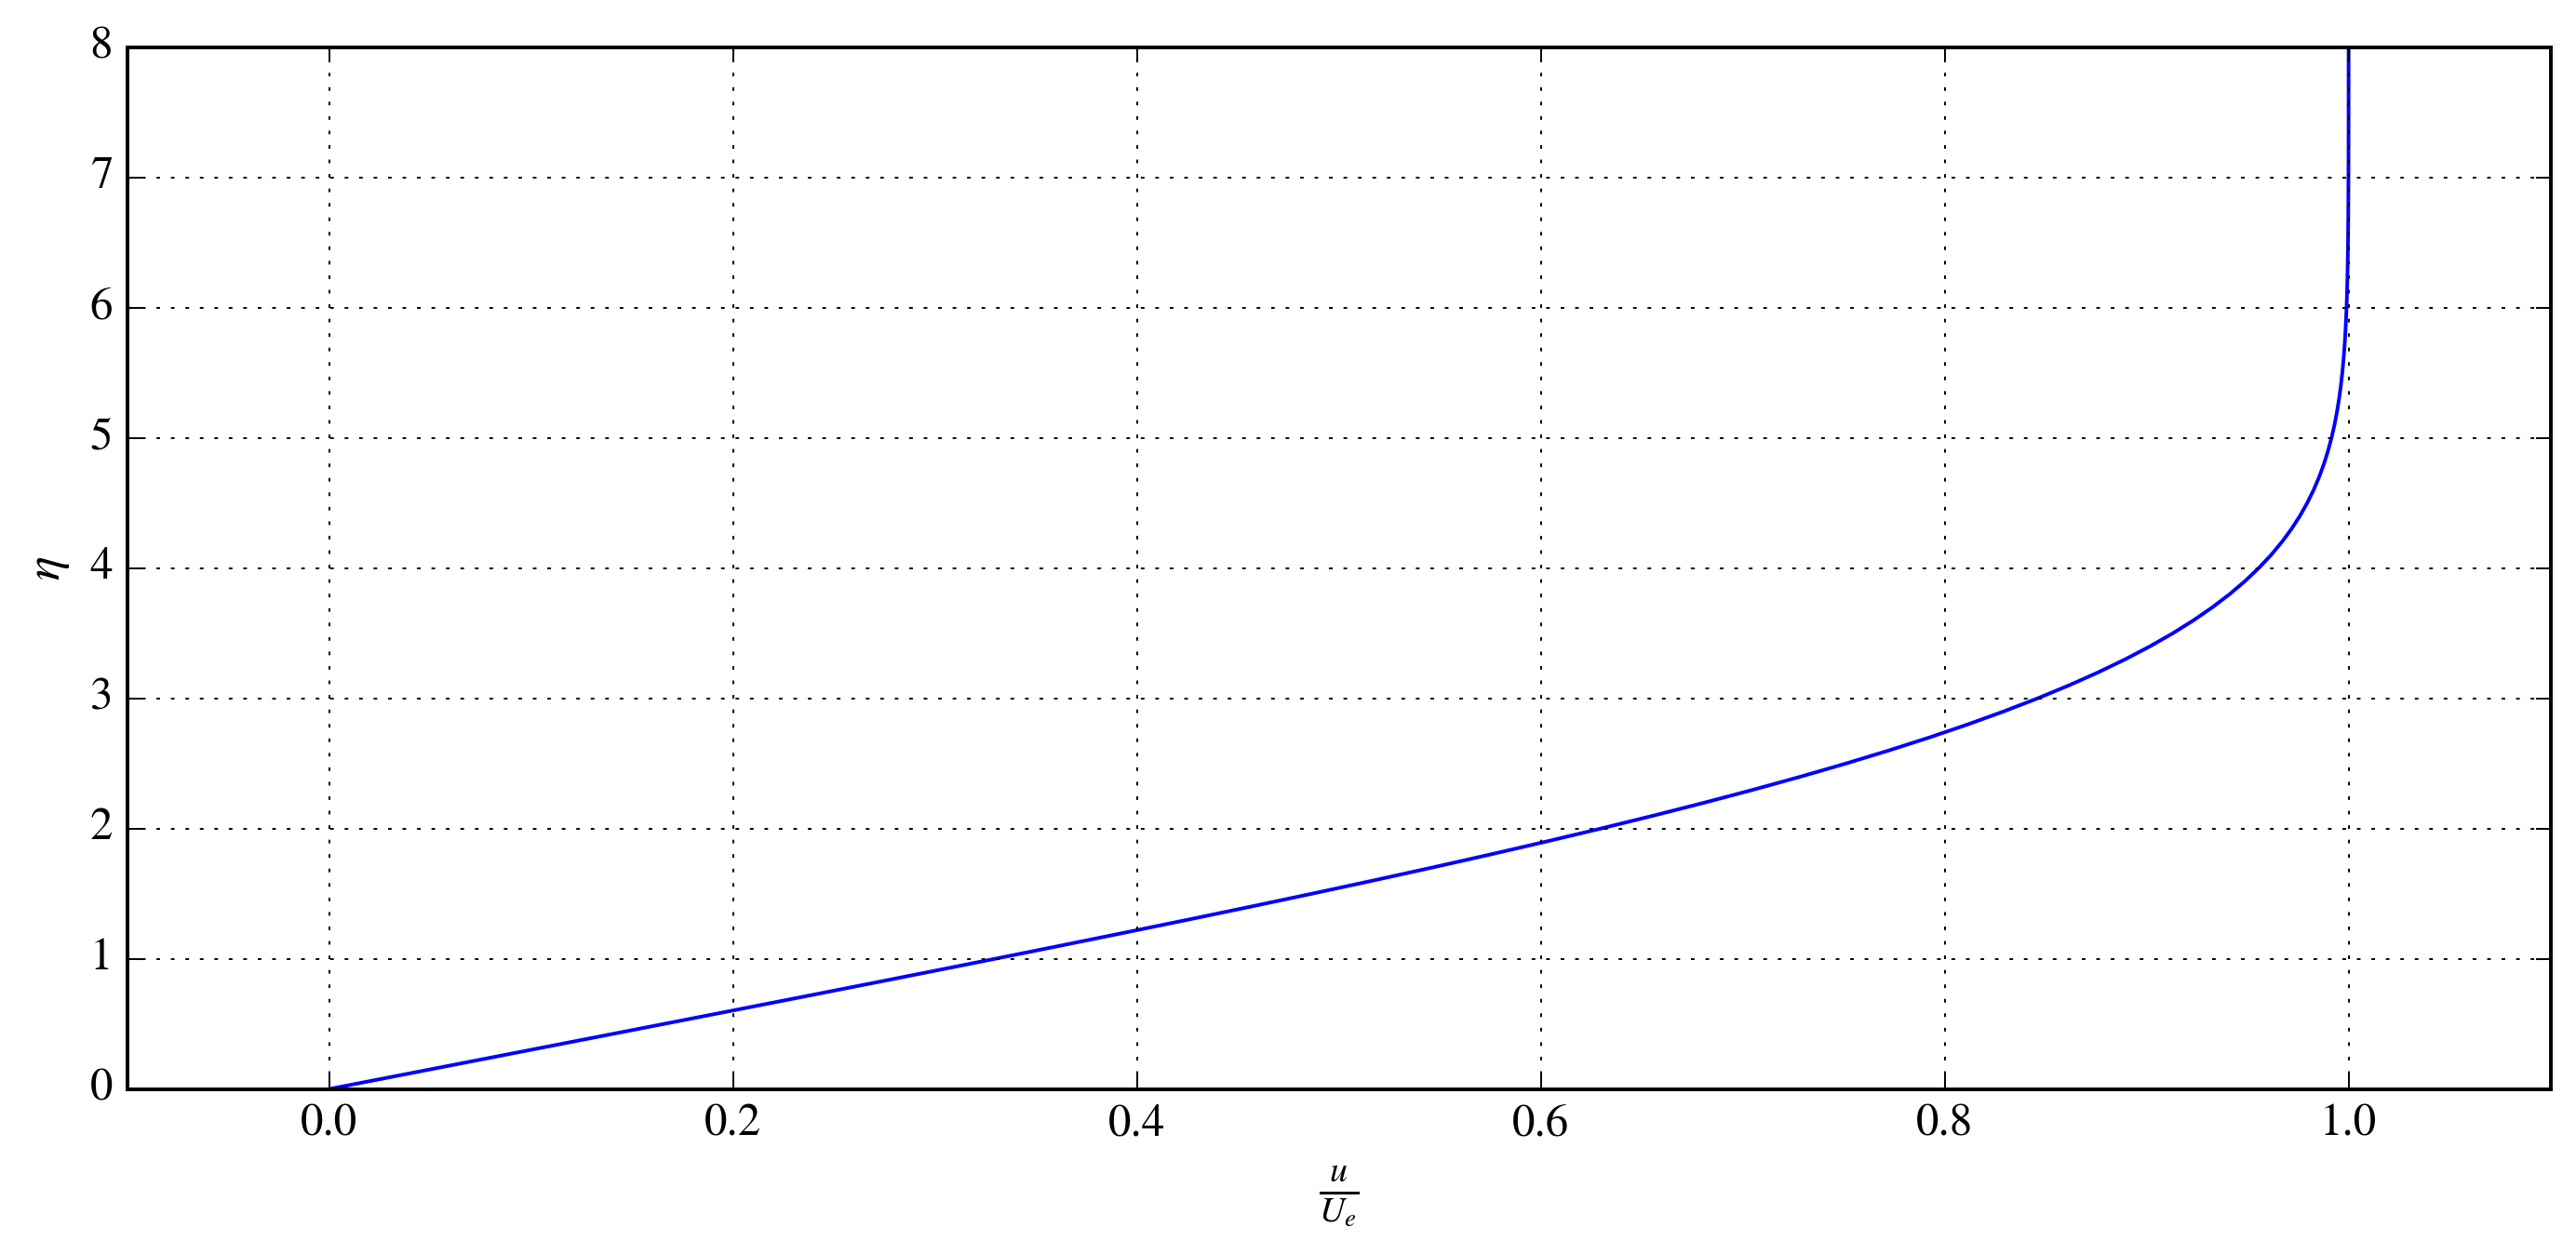

In [ ]:
plot( f[1], η )
xlabel( r'$\frac{u}{U_e}$' )
ylabel( r'$\eta$' )
grid()
xlim( (-0.1,1.1) )
ylim( (0,8) );

Plot of the dimensionless velocity $\displaystyle \frac{v}{U_e}\sqrt{\text{Re}_x}=\frac 12 \left( \eta f_1 - f_0\right)$ 

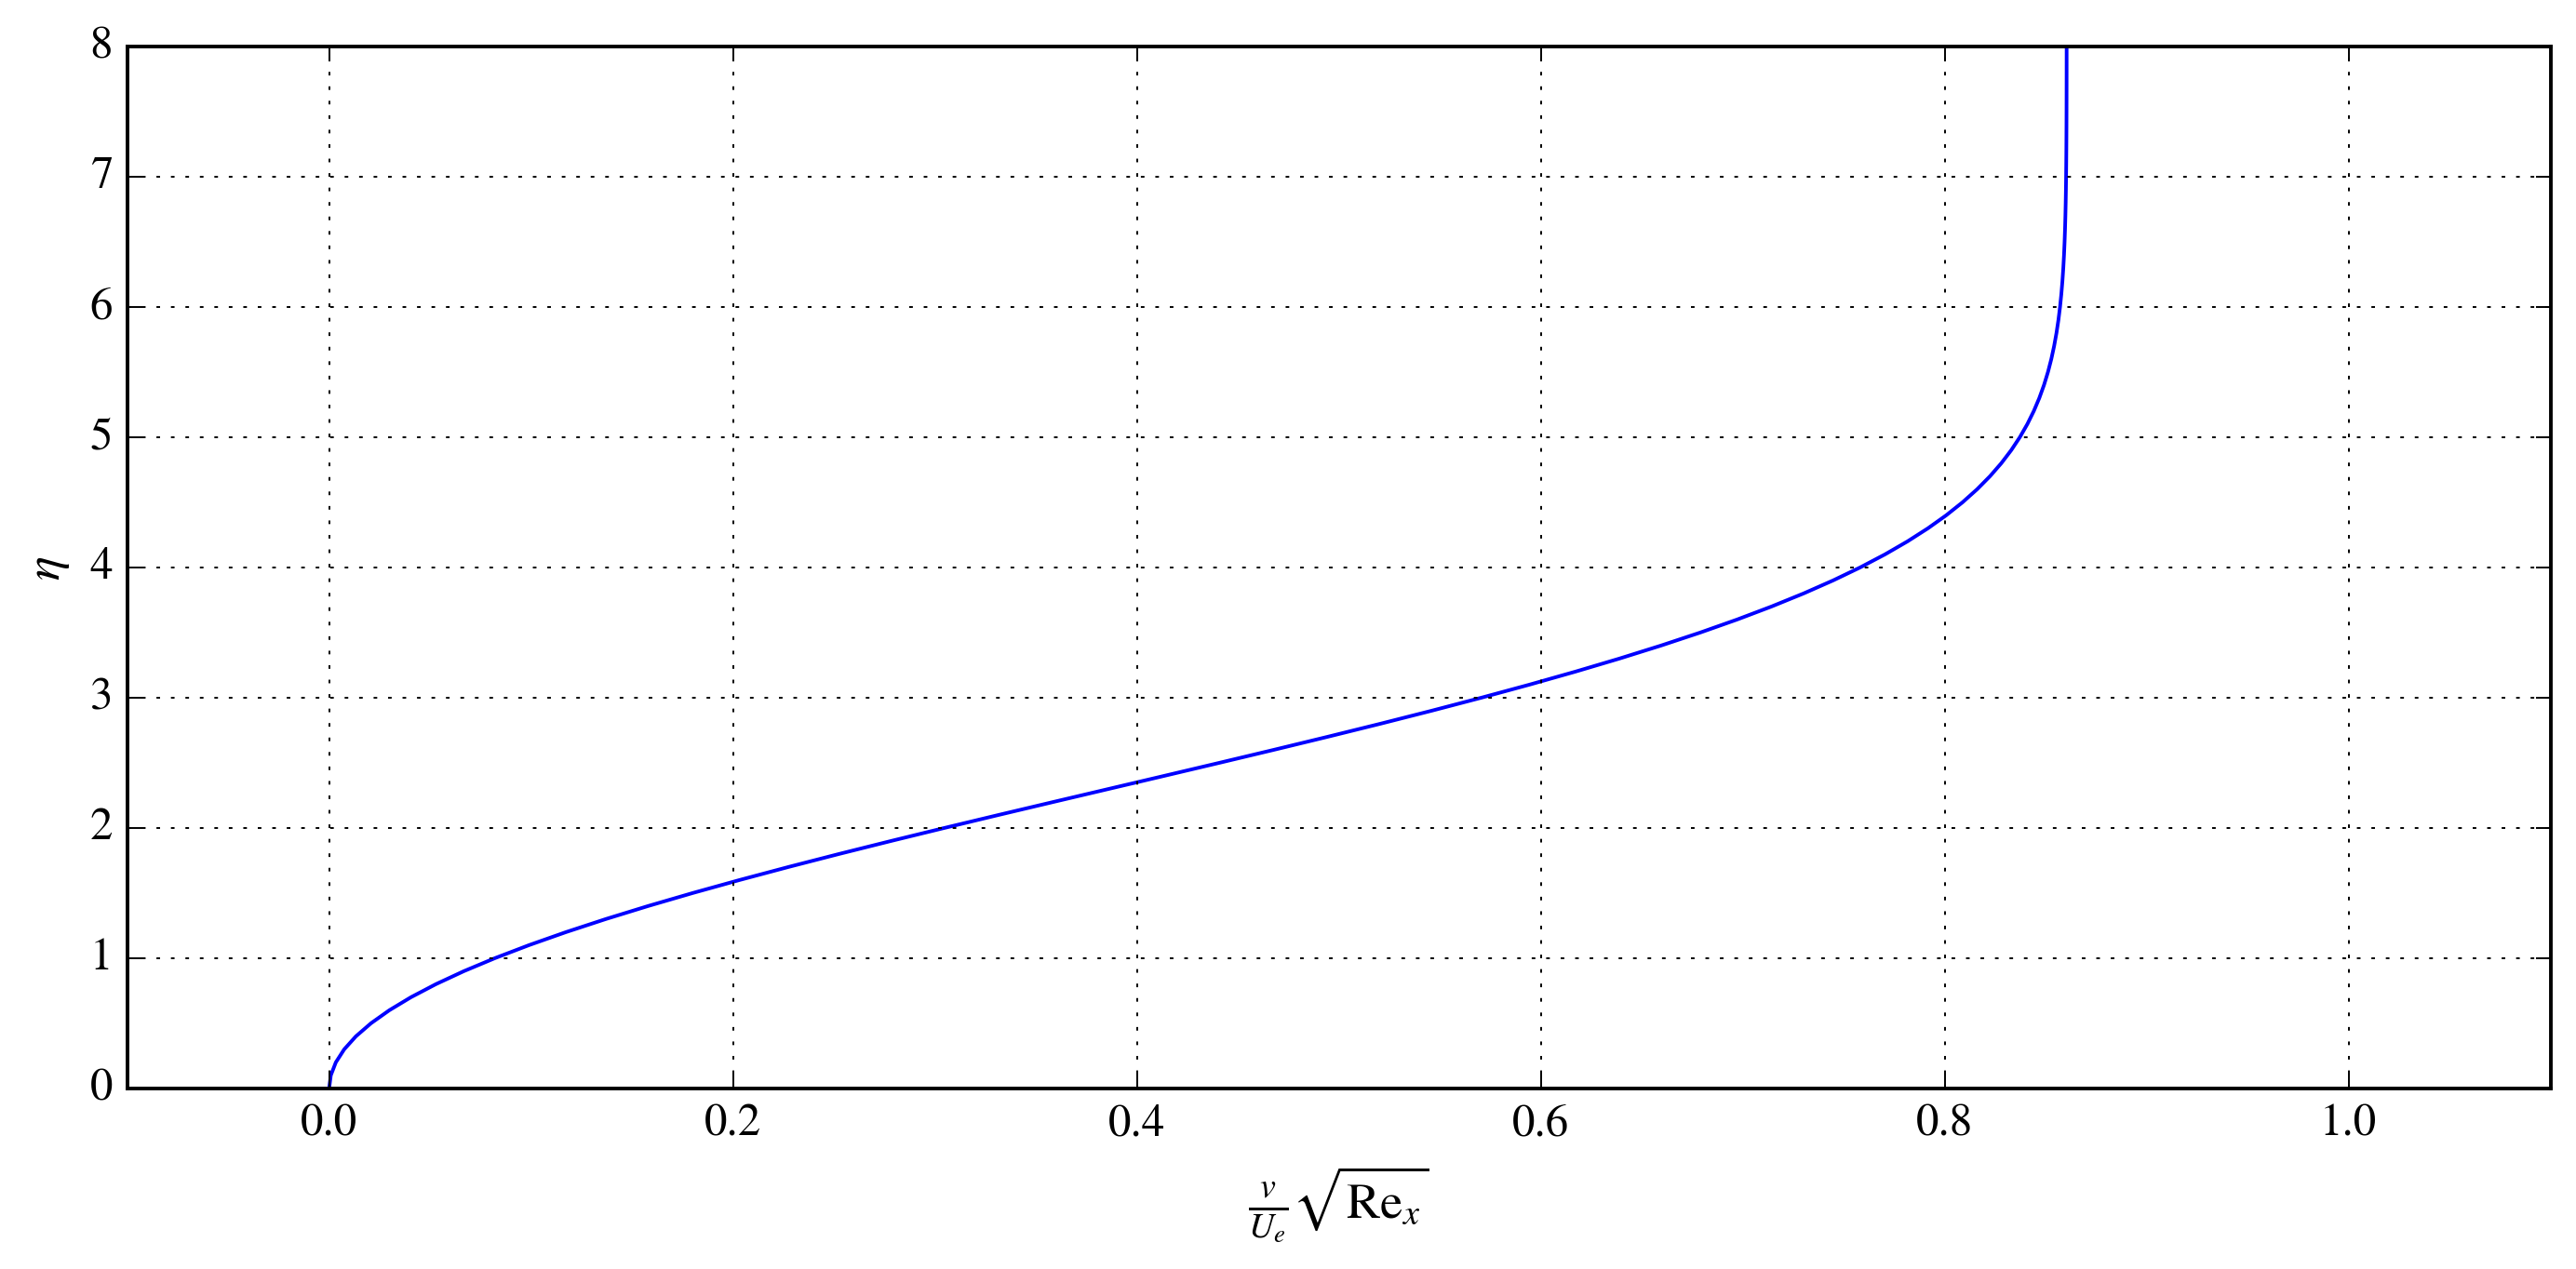

In [ ]:
v = 0.5 * ( η * f[1] - f[0] )

plot( v, η )
xlabel( r'$\frac{v}{U_e}\sqrt{\mathrm{Re}_x}$' )
ylabel( r'$\eta$' )
grid()
xlim( (-0.1,1.1) )
ylim( (0,8) );

In [ ]:
dic = { '$\eta$': η, '$f(\eta)$': f[0], '$u/Ue$': f[1], '$f^{\\prime\\prime}$': f[2] }
df = pd.DataFrame( dic )
pd.set_option('display.max_rows', len(η) )
df

,$\eta$,$f(\eta)$,$u/Ue$,$f^{\prime\prime}$
0,0.0,0.000000,0.000000,3.320573e-01
1,0.1,0.001660,0.033205,3.320482e-01
2,0.2,0.006641,0.066408,3.319839e-01
3,0.3,0.014941,0.099599,3.318094e-01
4,0.4,0.026560,0.132764,3.314699e-01
5,0.5,0.041493,0.165885,3.309110e-01
6,0.6,0.059735,0.198937,3.300792e-01
7,0.7,0.081277,0.231890,3.289221e-01
8,0.8,0.106108,0.264709,3.273893e-01
9,0.9,0.134213,0.297354,3.254327e-01
